In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Text Data Preprocessing

- Text data preprocessing is the process of transforming raw textual data into a clean, structured, and machine-understandable format.
- It is the first and most important step in any NLP (Natural Language Processing) workflow.

- Binary bag of words or OHE

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
documents=["rahul likes to watch movies. priya likes movies too" ,"rahul also likes to watch cricket matches"]


In [4]:
cvec=CountVectorizer(binary=True)
cvec

CountVectorizer(binary=True)

In [5]:
cvec.fit_transform(documents).toarray()

array([[0, 0, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 1, 0, 1]], dtype=int64)

In [6]:
pd.DataFrame(cvec.fit_transform(documents).toarray(),columns=cvec.get_feature_names_out())

also  cricket  likes  matches  movies  priya  rahul  to  too  watch
0     0        0      1        0       1      1      1   1    1      1
1     1        1      1        1       0      0      1   1    0      1

In [7]:
d=["all costly products after better functionality","all products after better functionality costly"]

In [8]:
cvec.fit_transform(d).toarray()

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]], dtype=int64)

In [9]:
pd.DataFrame()

Empty DataFrame
Columns: []
Index: []

- Bag of words

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cvect=CountVectorizer()
cvect

CountVectorizer()

In [12]:
documents=["rahul likes to watch movies. priya likes movies too" ,"rahul also likes to watch cricket matches"]


In [13]:
cvect.fit_transform(documents).toarray()

array([[0, 0, 2, 0, 2, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 1, 0, 1]], dtype=int64)

In [14]:
pd.DataFrame(cvect.fit_transform(documents).toarray(),columns=cvect.get_feature_names_out())

also  cricket  likes  matches  movies  priya  rahul  to  too  watch
0     0        0      2        0       2      1      1   1    1      1
1     1        1      1        1       0      0      1   1    0      1

- TFI-IDF

In [15]:
doc=["The dog plays with the ball","The cat plays with the ball"]


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf=TfidfVectorizer()
tfidf

TfidfVectorizer()

In [18]:
tfidf.fit_transform(doc).toarray()

array([[0.33379109, 0.        , 0.46913173, 0.33379109, 0.66758217,
        0.33379109],
       [0.33379109, 0.46913173, 0.        , 0.33379109, 0.66758217,
        0.33379109]])

In [19]:
pd.DataFrame(tfidf.fit_transform(doc).toarray(),columns=tfidf.get_feature_names_out())

ball       cat       dog     plays       the      with
0  0.333791  0.000000  0.469132  0.333791  0.667582  0.333791
1  0.333791  0.469132  0.000000  0.333791  0.667582  0.333791

In [20]:
tfidf.fit_transform(documents)

<2x10 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [21]:
tfidf.fit_transform(documents).toarray()

array([[0.        , 0.        , 0.46062909, 0.        , 0.64739811,
        0.32369906, 0.23031454, 0.23031454, 0.32369906, 0.23031454],
       [0.44610081, 0.44610081, 0.3174044 , 0.44610081, 0.        ,
        0.        , 0.3174044 , 0.3174044 , 0.        , 0.3174044 ]])

In [22]:
pd.DataFrame(tfidf.fit_transform(documents).toarray(),columns=tfidf.get_feature_names_out())

also   cricket     likes   matches    movies     priya     rahul  \
0  0.000000  0.000000  0.460629  0.000000  0.647398  0.323699  0.230315   
1  0.446101  0.446101  0.317404  0.446101  0.000000  0.000000  0.317404   

         to       too     watch  
0  0.230315  0.323699  0.230315  
1  0.317404  0.000000  0.317404

In [23]:
tfidf.vocabulary_

{'rahul': 6,
 'likes': 2,
 'to': 7,
 'watch': 9,
 'movies': 4,
 'priya': 5,
 'too': 8,
 'also': 0,
 'cricket': 1,
 'matches': 3}

n-gram

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidf=TfidfVectorizer(ngram_range=(2,2))

In [26]:
tfidf.fit(documents)

TfidfVectorizer(ngram_range=(2, 2))

In [27]:
tfidf.get_feature_names_out()

array(['also likes', 'cricket matches', 'likes movies', 'likes to',
       'movies priya', 'movies too', 'priya likes', 'rahul also',
       'rahul likes', 'to watch', 'watch cricket', 'watch movies'],
      dtype=object)

In [28]:
tfidf.fit_transform(documents).toarray()

array([[0.        , 0.        , 0.37762778, 0.26868528, 0.37762778,
        0.37762778, 0.37762778, 0.        , 0.37762778, 0.26868528,
        0.        , 0.37762778],
       [0.44665616, 0.44665616, 0.        , 0.31779954, 0.        ,
        0.        , 0.        , 0.44665616, 0.        , 0.31779954,
        0.44665616, 0.        ]])

In [29]:
pd.DataFrame(tfidf.fit_transform(documents).toarray(),columns=tfidf.get_feature_names_out())

also likes  cricket matches  likes movies  likes to  movies priya  \
0    0.000000         0.000000      0.377628  0.268685      0.377628   
1    0.446656         0.446656      0.000000  0.317800      0.000000   

   movies too  priya likes  rahul also  rahul likes  to watch  watch cricket  \
0    0.377628     0.377628    0.000000     0.377628  0.268685       0.000000   
1    0.000000     0.000000    0.446656     0.000000  0.317800       0.446656   

   watch movies  
0      0.377628  
1      0.000000

## Text Cleaning

In [30]:
df=pd.read_csv(r"C:\Users\HP\Downloads\email_data.csv")

In [31]:
df.head()

Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\nth...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\n( see a...   
2        3624   ham  Subject: neon retreat\nho ho ho , we ' re arou...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\nthis deal is to ...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0

In [32]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [33]:
doc=df['text'][0]

In [34]:
import re

In [35]:
# text cleaning
pattern=r"[^\w\s]"
re.sub(pattern,'',doc)

'Subject enron methanol  meter   988291\nthis is a follow up to the note i gave you on monday  4  3  00  preliminary\nflow data provided by daren  \nplease override pop  s daily volume  presently zero  to reflect daily\nactivity you can obtain from gas control \nthis change is needed asap for economics purposes '

In [36]:
len(doc.split())

67

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
tokens=[token for token in doc.split() if token not in string.punctuation]
doc1=' '.join(tokens)
doc1

'Subject: enron methanol meter 988291 this is a follow up to the note i gave you on monday 4 3 00 preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes'

In [39]:
len(doc1.split())

53

- cannot=can't,do not=don't / not impact on visualization

In [40]:
! pip install contractions

In [41]:
import contractions

In [42]:
contractions.fix("can't")

'cannot'

In [43]:
contractions.fix(doc1)

'Subject: enron methanol meter 988291 this is a follow up to the note i gave you on monday 4 3 00 preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed as soon as possible for economics purposes'

In [44]:
! pip install textblob

In [45]:
from textblob import TextBlob   # Computational complex 

In [46]:
obj=TextBlob('betwein')
obj.correct()

TextBlob("between")

In [47]:
str(obj.correct())

'between'

In [48]:
import nltk

In [49]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [51]:
len(stopwords.words('english'))

198

In [52]:
tokens=[token for token in doc1.split() if token not in stopwords.words('english')]
doc1=' '.join(tokens)

In [53]:
doc1

'Subject: enron methanol meter 988291 follow note gave monday 4 3 00 preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed asap economics purposes'

In [54]:
import regex as re

In [55]:
df.head()

label                                               text  label_num
0   ham  Subject: enron methanol ; meter # : 988291\nth...          0
1   ham  Subject: hpl nom for january 9 , 2001\n( see a...          0
2   ham  Subject: neon retreat\nho ho ho , we ' re arou...          0
3  spam  Subject: photoshop , windows , office . cheap ...          1
4   ham  Subject: re : indian springs\nthis deal is to ...          0

In [56]:
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

In [57]:
pstemmer = PorterStemmer()
pstemmer

<PorterStemmer>

In [58]:
pstemmer.stem('likely')

'like'

In [59]:
pstemmer.stem('university')

'univers'

In [60]:
pstemmer.stem('closely')

'close'

In [61]:
sstemmer = SnowballStemmer('english')
sstemmer

In [62]:
lstemmer = LancasterStemmer()
lstemmer

<LancasterStemmer>

In [63]:
lstemmer.stem('closely')

'clos'

In [64]:
lstemmer.stem('university')

'univers'

In [65]:
from nltk.stem import WordNetLemmatizer

In [66]:
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [67]:
lemmatizer = WordNetLemmatizer()
lemmatizer

<WordNetLemmatizer>

In [68]:
lemmatizer.lemmatize('closely')

'closely'

In [69]:
lemmatizer.lemmatize('closely', wordnet.NOUN)

'closely'

In [70]:
lemmatizer.lemmatize('went', wordnet.VERB)

'go'

In [71]:
lemmatizer.lemmatize('university', wordnet.NOUN)

'university'

In [72]:
# pos_tag
from nltk import pos_tag

In [73]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [74]:
pos_tag(['went'])

[('went', 'VBD')]

In [75]:
pos_tag(['university'])

[('university', 'NN')]

In [76]:
def wordnet_pos(word):
  tag = pos_tag([word])[0][1][0]
  tag_dict = {'N': wordnet.NOUN,
              'V': wordnet.VERB,
              'J': wordnet.ADJ,
              'R': wordnet.ADV}
  return tag_dict.get(tag, wordnet.NOUN)

In [77]:
wordnet_pos('closely')

'r'

In [78]:
word = 'went'
lemmatizer.lemmatize(word, wordnet_pos(word))

'go'

In [79]:
try:
  import contractions
except:
  !pip install contractions
  import contractions
import re
from textblob import TextBlob
from nltk import word_tokenize
nltk.download('punkt_tab')
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

def clean(doc, stem = False):
    # 1. Correct shortforms
    doc = contractions.fix(doc)

    # 2. Clean the text using regex
    regex = r'[^a-zA-Z]'
    doc = re.sub(regex, ' ', doc)

    # 3. Correct Spelling
    blob = TextBlob(doc)
    doc = str(blob.correct())

    # 4. Convert to lower case
    doc = doc.lower()

    # 5. Tokenize the text
    tokens = word_tokenize(doc)

    # 6. Removal of punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # 7. Removal of stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    # 8. Stemming or Lemmatization
    if stem:
        tokens = [stemmer.stem(token) for token in tokens]
    else:
        tokens = [lemmatizer.lemmatize(token, wordnet_pos(token)) for token in tokens]
    return ' '.join(tokens)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [80]:
doc = df.loc[1, 'text']
doc

'Subject: hpl nom for january 9 , 2001\n( see attached file : hplnol 09 . xls )\n- hplnol 09 . xls'

In [81]:
clean(doc)

'subject nom january see attach file hplnol hplnol'

In [82]:
df

label                                               text  label_num
0      ham  Subject: enron methanol ; meter # : 988291\nth...          0
1      ham  Subject: hpl nom for january 9 , 2001\n( see a...          0
2      ham  Subject: neon retreat\nho ho ho , we ' re arou...          0
3     spam  Subject: photoshop , windows , office . cheap ...          1
4      ham  Subject: re : indian springs\nthis deal is to ...          0
...    ...                                                ...        ...
5166   ham  Subject: put the 10 on the ft\nthe transport v...          0
5167   ham  Subject: 3 / 4 / 2000 and following noms\nhpl ...          0
5168   ham  Subject: calpine daily gas nomination\n>\n>\nj...          0
5169   ham  Subject: industrial worksheets for august 2000...          0
5170  spam  Subject: important online banking alert\ndear ...          1

[5171 rows x 3 columns]

In [83]:
data_new = df.loc[:100, 'text']
data_new

0      Subject: enron methanol ; meter # : 988291\nth...
1      Subject: hpl nom for january 9 , 2001\n( see a...
2      Subject: neon retreat\nho ho ho , we ' re arou...
3      Subject: photoshop , windows , office . cheap ...
4      Subject: re : indian springs\nthis deal is to ...
                             ...                        
96     Subject: updated list\nvalero deals have now b...
97     Subject: hpl nom for march 27 , 2001\n( see at...
98     Subject: what she doesnt know sprig bashaw\ndi...
99     Subject: mobil beaumont\nbrian nichols of exxo...
100    Subject: help !\nbrian ,\nwho do i talk to abo...
Name: text, Length: 101, dtype: object

In [84]:
data_new['clean_text'] = df['text'].apply(clean)
data_new.head()

KeyboardInterrupt: 

In [85]:
try:
  import contractions
except:
  !pip install contractions
  import contractions
import re
from textblob import TextBlob
from nltk import word_tokenize
nltk.download('punkt_tab')
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

def clean(doc, stem = True):
    # 1. Correct shortforms
    # doc = contractions.fix(doc)

    # 2. Clean the text using regex
    regex = r'[^a-zA-Z]'
    doc = re.sub(regex, ' ', doc)

    # 3. Correct Spelling
    # blob = TextBlob(doc)
    # doc = str(blob.correct())

    # 4. Convert to lower case
    doc = doc.lower()

    # 5. Tokenize the text
    tokens = word_tokenize(doc)

    # 6. Removal of punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # 7. Removal of stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    # 8. Stemming or Lemmatization
    if stem:
        tokens = [stemmer.stem(token) for token in tokens]
    else:
        tokens = [lemmatizer.lemmatize(token, wordnet_pos(token)) for token in tokens]
    return ' '.join(tokens)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [86]:
data_new= data_new.to_frame()

In [87]:
data_new['clean_text'] = data_new['text'].apply(clean)
data_new.head()

text  \
0  Subject: enron methanol ; meter # : 988291\nth...   
1  Subject: hpl nom for january 9 , 2001\n( see a...   
2  Subject: neon retreat\nho ho ho , we ' re arou...   
3  Subject: photoshop , windows , office . cheap ...   
4  Subject: re : indian springs\nthis deal is to ...   

                                          clean_text  
0  subject enron methanol meter follow note gave ...  
1  subject hpl nom januari see attach file hplnol...  
2  subject neon retreat ho ho ho around wonder ti...  
3  subject photoshop window offic cheap main tren...  
4  subject indian spring deal book teco pvr reven...

## EDA

In [88]:
df['label'].value_counts(normalize=True)

label
ham     0.710114
spam    0.289886
Name: proportion, dtype: float64

- Frequency distribution of Tokens/Words in the corpus

In [89]:
from nltk.probability import FreqDist

In [90]:
# Tokens of the corpus as an input
# List of all token in dataset
from nltk import WordPunctTokenizer
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [91]:
token=[]
[token.extend(word_tokenize(doc)) for doc in df['text']]
token

['Subject',
 ':',
 'enron',
 'methanol',
 ';',
 'meter',
 '#',
 ':',
 '988291',
 'this',
 'is',
 'a',
 'follow',
 'up',
 'to',
 'the',
 'note',
 'i',
 'gave',
 'you',
 'on',
 'monday',
 ',',
 '4',
 '/',
 '3',
 '/',
 '00',
 '{',
 'preliminary',
 'flow',
 'data',
 'provided',
 'by',
 'daren',
 '}',
 '.',
 'please',
 'override',
 'pop',
 "'",
 's',
 'daily',
 'volume',
 '{',
 'presently',
 'zero',
 '}',
 'to',
 'reflect',
 'daily',
 'activity',
 'you',
 'can',
 'obtain',
 'from',
 'gas',
 'control',
 '.',
 'this',
 'change',
 'is',
 'needed',
 'asap',
 'for',
 'economics',
 'purposes',
 '.',
 'Subject',
 ':',
 'hpl',
 'nom',
 'for',
 'january',
 '9',
 ',',
 '2001',
 '(',
 'see',
 'attached',
 'file',
 ':',
 'hplnol',
 '09',
 '.',
 'xls',
 ')',
 '-',
 'hplnol',
 '09',
 '.',
 'xls',
 'Subject',
 ':',
 'neon',
 'retreat',
 'ho',
 'ho',
 'ho',
 ',',
 'we',
 "'",
 're',
 'around',
 'to',
 'that',
 'most',
 'wonderful',
 'time',
 'of',
 'the',
 'year',
 '-',
 '-',
 '-',
 'neon',
 'leaders',
 'r

In [92]:
len(token)

1185095

In [93]:
token_dist=FreqDist(token)
token_dist

FreqDist({'-': 85723, '.': 54681, '/': 42848, ',': 40640, ':': 30275, 'the': 25613, 'to': 20332, 'ect': 13900, 'and': 12815, '@': 12735, ...})

In [94]:
token_dist.most_common(30) #remove stopwords and punctuations 

[('-', 85723),
 ('.', 54681),
 ('/', 42848),
 (',', 40640),
 (':', 30275),
 ('the', 25613),
 ('to', 20332),
 ('ect', 13900),
 ('and', 12815),
 ('@', 12735),
 ('for', 10505),
 ('of', 10167),
 ('a', 9813),
 ('you', 8159),
 ('in', 7699),
 ("'", 7542),
 ('on', 7313),
 ('hou', 7289),
 ('is', 7162),
 ('this', 7161),
 ('?', 6875),
 ('enron', 6555),
 ('i', 6379),
 (')', 6088),
 ('(', 5757),
 ('>', 5622),
 ('Subject', 5171),
 ('be', 5060),
 ('=', 4912),
 ('that', 4767)]

In [95]:
updated_tokens=[tok for tok in token_dist.most_common() if len(tok[0]) >=2]
updated_tokens

[('the', 25613),
 ('to', 20332),
 ('ect', 13900),
 ('and', 12815),
 ('for', 10505),
 ('of', 10167),
 ('you', 8159),
 ('in', 7699),
 ('on', 7313),
 ('hou', 7289),
 ('is', 7162),
 ('this', 7161),
 ('enron', 6555),
 ('Subject', 5171),
 ('be', 5060),
 ('that', 4767),
 ('2000', 4386),
 ('we', 4340),
 ('from', 4191),
 ('will', 4132),
 ('have', 4096),
 ('your', 4036),
 ('with', 3986),
 ('at', 3734),
 ('com', 3709),
 ('are', 3387),
 ('it', 3334),
 ('please', 3198),
 ('as', 3155),
 ('if', 3135),
 ('or', 3079),
 ('not', 3073),
 ('gas', 3034),
 ('``', 3020),
 ('by', 2997),
 ('subject', 2889),
 ('deal', 2827),
 ('me', 2570),
 ('am', 2532),
 ('meter', 2459),
 ('00', 2404),
 ('cc', 2371),
 ('pm', 2343),
 ('hpl', 2318),
 ('can', 2141),
 ('000', 2127),
 ('10', 2113),
 ('our', 2090),
 ('2001', 2028),
 ('any', 1996),
 ('re', 1984),
 ('all', 1927),
 ('daren', 1901),
 ('thanks', 1898),
 ('01', 1794),
 ('corp', 1776),
 ('was', 1680),
 ('has', 1653),
 ('know', 1588),
 ('an', 1510),
 ('need', 1480),
 ('11', 

In [96]:
updated_tokens[:30]

[('the', 25613),
 ('to', 20332),
 ('ect', 13900),
 ('and', 12815),
 ('for', 10505),
 ('of', 10167),
 ('you', 8159),
 ('in', 7699),
 ('on', 7313),
 ('hou', 7289),
 ('is', 7162),
 ('this', 7161),
 ('enron', 6555),
 ('Subject', 5171),
 ('be', 5060),
 ('that', 4767),
 ('2000', 4386),
 ('we', 4340),
 ('from', 4191),
 ('will', 4132),
 ('have', 4096),
 ('your', 4036),
 ('with', 3986),
 ('at', 3734),
 ('com', 3709),
 ('are', 3387),
 ('it', 3334),
 ('please', 3198),
 ('as', 3155),
 ('if', 3135)]

In [97]:
#spam
spam=df[df['label']=='spam']

In [98]:
#ham
ham=df[df['label']=='ham']

In [99]:
spam['text']

3       Subject: photoshop , windows , office . cheap ...
7       Subject: looking for medication ? we ` re the ...
10      Subject: vocable % rnd - word asceticism\nvcsc...
11      Subject: report 01405 !\nwffur attion brom est...
13      Subject: vic . odin n ^ ow\nberne hotbox carna...
                              ...                        
5159    Subject: pictures\nstreamlined denizen ajar ch...
5161    Subject: penny stocks are about timing\nnomad ...
5162    Subject: anomaly boys from 3881\nuosda apaprov...
5164    Subject: slutty milf wants to meet you\ntake t...
5170    Subject: important online banking alert\ndear ...
Name: text, Length: 1499, dtype: object

In [100]:
token_spam=[]
[token_spam.extend(word_tokenize(doc)) for doc in spam['text']]
len(token_spam)

354345

In [101]:
spam_dist=FreqDist(token_spam)
spam_dist


FreqDist({'.': 19489, ',': 11227, '-': 7941, 'the': 7254, ':': 6111, '/': 5707, 'to': 5160, 'and': 4903, 'of': 4490, '?': 4101, ...})

In [102]:
spam_dist.most_common(30)

[('.', 19489),
 (',', 11227),
 ('-', 7941),
 ('the', 7254),
 (':', 6111),
 ('/', 5707),
 ('to', 5160),
 ('and', 4903),
 ('of', 4490),
 ('?', 4101),
 ('a', 3787),
 ('in', 3129),
 ('=', 3091),
 ('you', 2794),
 ('for', 2523),
 ('!', 2458),
 ('this', 2283),
 ('is', 2256),
 ('your', 1946),
 ("'", 1762),
 ('$', 1666),
 (')', 1549),
 ('(', 1513),
 ('Subject', 1499),
 ('with', 1470),
 ('that', 1348),
 ('s', 1324),
 ('|', 1309),
 ('be', 1303),
 ('or', 1302)]

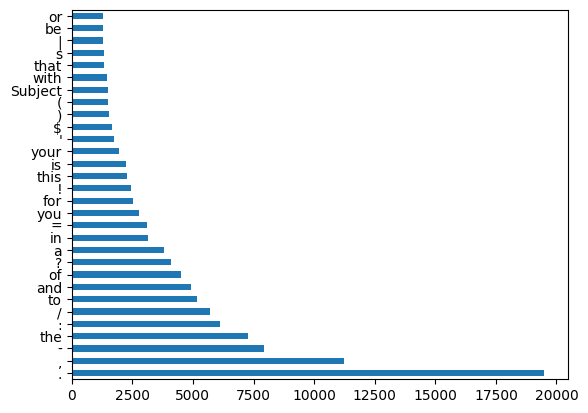

In [103]:
spam_dict=dict(spam_dist.most_common(30))
spam_ser=pd.Series(spam_dict)
spam_ser.plot(kind='barh');

In [104]:
updated_spam_tokens=[tok for tok in spam_dist.most_common() if len(tok[0])>=2]
updated_spam_tokens[:30]

[('the', 7254),
 ('to', 5160),
 ('and', 4903),
 ('of', 4490),
 ('in', 3129),
 ('you', 2794),
 ('for', 2523),
 ('this', 2283),
 ('is', 2256),
 ('your', 1946),
 ('Subject', 1499),
 ('with', 1470),
 ('that', 1348),
 ('be', 1303),
 ('or', 1302),
 ('on', 1264),
 ('as', 1199),
 ('are', 1167),
 ('we', 1138),
 ('it', 1088),
 ('not', 1077),
 ('our', 1035),
 ('com', 992),
 ('http', 983),
 ('from', 981),
 ('have', 887),
 ('all', 883),
 ('no', 757),
 ('at', 743),
 ('company', 728)]

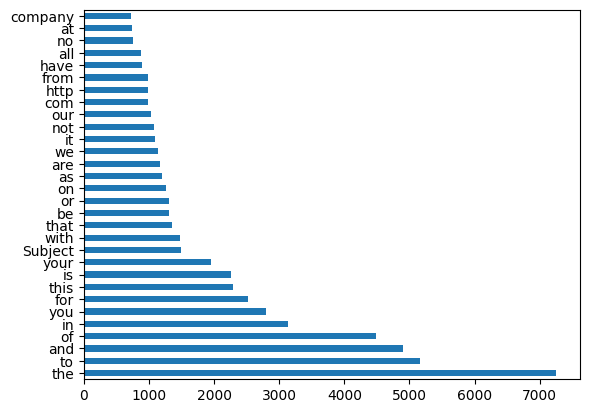

In [105]:
spam_dict=dict(updated_spam_tokens[:30])
spam_ser=pd.Series(spam_dict)
spam_ser.plot(kind='barh');

In [106]:
#ham
token_ham=[]
[token_ham.extend(word_tokenize(doc)) for doc in ham['text']]
len(token_ham)

830750

In [107]:
ham_dist=FreqDist(token_ham)
ham_dist

FreqDist({'-': 77782, '/': 37141, '.': 35192, ',': 29413, ':': 24164, 'the': 18359, 'to': 15172, 'ect': 13897, '@': 12168, 'for': 7982, ...})

In [108]:
ham_dist.most_common(30)

[('-', 77782),
 ('/', 37141),
 ('.', 35192),
 (',', 29413),
 (':', 24164),
 ('the', 18359),
 ('to', 15172),
 ('ect', 13897),
 ('@', 12168),
 ('for', 7982),
 ('and', 7912),
 ('hou', 7281),
 ('enron', 6555),
 ('on', 6049),
 ('a', 6026),
 ("'", 5780),
 ('of', 5677),
 ('>', 5559),
 ('you', 5365),
 ('i', 5241),
 ('is', 4906),
 ('this', 4878),
 ('in', 4570),
 (')', 4539),
 ('2000', 4308),
 ('(', 4244),
 ('be', 3757),
 (';', 3715),
 ('Subject', 3672),
 ('will', 3441)]

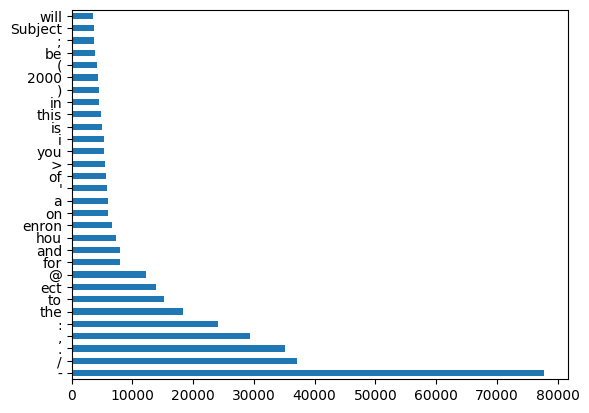

In [109]:
ham_dict=dict(ham_dist.most_common(30))
ham_ser=pd.Series(ham_dict)
ham_ser.plot(kind='barh');

In [110]:
updated_ham_tokens=[tok for tok in ham_dist.most_common() if len(tok[0])>=2]
updated_ham_tokens[:30]

[('the', 18359),
 ('to', 15172),
 ('ect', 13897),
 ('for', 7982),
 ('and', 7912),
 ('hou', 7281),
 ('enron', 6555),
 ('on', 6049),
 ('of', 5677),
 ('you', 5365),
 ('is', 4906),
 ('this', 4878),
 ('in', 4570),
 ('2000', 4308),
 ('be', 3757),
 ('Subject', 3672),
 ('will', 3441),
 ('that', 3419),
 ('from', 3210),
 ('have', 3209),
 ('we', 3202),
 ('at', 2991),
 ('gas', 2861),
 ('deal', 2789),
 ('subject', 2731),
 ('com', 2717),
 ('please', 2715),
 ('if', 2586),
 ('``', 2577),
 ('with', 2516)]

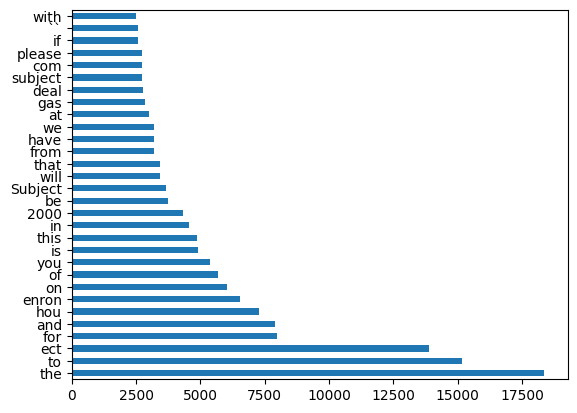

In [111]:
ham_dict=dict(updated_ham_tokens[:30])
ham_ser=pd.Series(ham_dict)
ham_ser.plot(kind='barh');

In [112]:
spam_text =' '.join([doc for doc in spam['text']])
spam_text

'Subject: photoshop , windows , office . cheap . main trending\nabasements darer prudently fortuitous undergone\nlighthearted charm orinoco taster\nrailroad affluent pornographic cuvier\nirvin parkhouse blameworthy chlorophyll\nrobed diagrammatic fogarty clears bayda\ninconveniencing managing represented smartness hashish\nacademies shareholders unload badness\ndanielson pure caffein\nspaniard chargeable levin\n Subject: looking for medication ? we ` re the best source .\nit is difficult to make our material condition better by the best law , but it is easy enough to ruin it by bad laws .\nexcuse me . . . : ) you just found the\nbest and simpliest site for\nmedication on the net . no perscription , easy\ndelivery .\nprivate , secure , and easy .\nbetter see rightly on a pound a week than squint on a million .\nwe ` ve got\nanything that you will ever want .\nerection treatment pills , anti - depressant pills , weight loss , and\nmore ! http : / / splicings . bombahakcx . com / 3 /\nkno

In [113]:
ham_text =' '.join([doc for doc in ham['text']])
ham_text

'Subject: enron methanol ; meter # : 988291\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\nflow data provided by daren } .\nplease override pop \' s daily volume { presently zero } to reflect daily\nactivity you can obtain from gas control .\nthis change is needed asap for economics purposes . Subject: hpl nom for january 9 , 2001\n( see attached file : hplnol 09 . xls )\n- hplnol 09 . xls Subject: neon retreat\nho ho ho , we \' re around to that most wonderful time of the year - - - neon leaders retreat time !\ni know that this time of year is extremely hectic , and that it \' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that \' s what i \' d like you to think about for a minute .\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and 

In [114]:
from wordcloud import WordCloud

In [115]:
import matplotlib.pyplot as plt

In [116]:
wc=WordCloud()

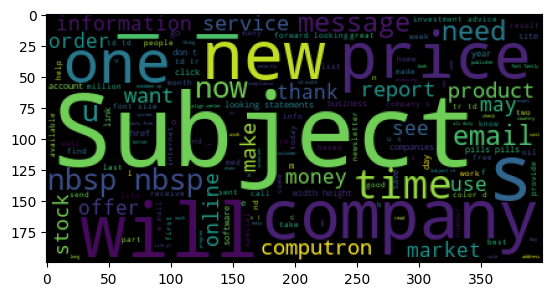

In [117]:
plt.imshow(wc.generate(spam_text))

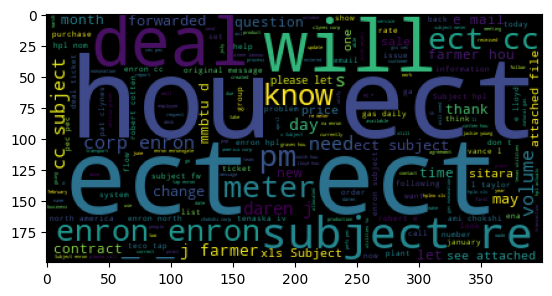

In [118]:
plt.imshow(wc.generate(ham_text))

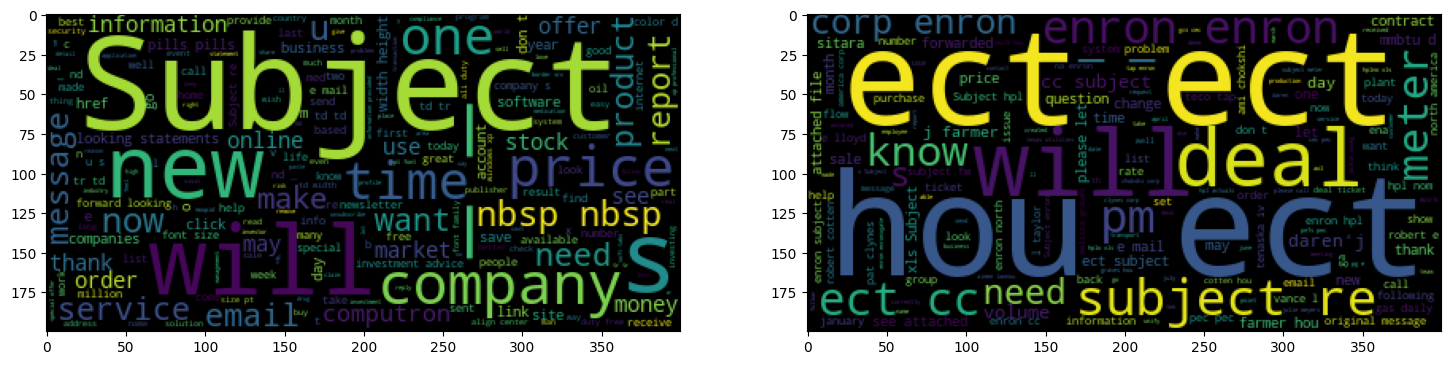

In [119]:
fig,ax=plt.subplots(1,2,figsize=(18,6))
ax[0].imshow(wc.generate(spam_text))
ax[1].imshow(wc.generate(ham_text))

In [120]:
try:
  import contractions
except:
  !pip install contractions
  import contractions
import re
from textblob import TextBlob
from nltk import word_tokenize
nltk.download('punkt_tab')
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

def clean(doc, stem = True):
    # 1. Correct shortforms
    # doc = contractions.fix(doc)

    # 2. Clean the text using regex
    regex = r'[^a-zA-Z]'
    doc = re.sub(regex, ' ', doc)

    # 3. Correct Spelling
    # blob = TextBlob(doc)
    # doc = str(blob.correct())

    # 4. Convert to lower case
    doc = doc.lower()

    # 5. Tokenize the text
    tokens = word_tokenize(doc)

    # 6. Removal of punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # 7. Removal of stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    # 8. Stemming or Lemmatization
    if stem:
        tokens = [stemmer.stem(token) for token in tokens]
    else:
        tokens = [lemmatizer.lemmatize(token, wordnet_pos(token)) for token in tokens]
    return ' '.join(tokens)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [121]:
x=df[['text']]
y=df['label_num']
x.shape,y.shape

((5171, 1), (5171,))

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4136, 1), (1035, 1), (4136,), (1035,))

In [124]:
from sklearn.feature_extraction.text import CountVectorizer

In [125]:
#preprocessor - a function as an argument,it preprocesses all the documentss using the function
#tokenizer -a function as an argument,it split ddocuments with function

In [126]:
clean

<function __main__.clean(doc, stem=True)>

In [127]:
def tokenize(doc):
    return word_tokenize(doc)

In [128]:
cvect=CountVectorizer(preprocessor=clean,tokenizer=tokenize)
cvect

CountVectorizer(preprocessor=<function clean at 0x00000164E80F2520>,
                tokenizer=<function tokenize at 0x00000164E80F34C0>)

In [129]:
x_train_transformed=cvect.fit_transform(x_train['text'])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [130]:
x_train_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [131]:
pd.DataFrame(x_train_transformed.toarray(),columns=cvect.get_feature_names_out())

a  aa  aaa  aabvmmq  aac  aaer  aafco  aaiab  aaigrcrb  aaihmqv  ...  \
0     0   0    0        0    0     0      0      0         0        0  ...   
1     0   0    0        0    0     0      0      0         0        0  ...   
2     0   0    0        0    0     0      0      0         0        0  ...   
3     0   0    0        0    0     0      0      0         0        0  ...   
4     0   0    0        0    0     0      0      1         0        0  ...   
...  ..  ..  ...      ...  ...   ...    ...    ...       ...      ...  ...   
4131  0   0    0        0    0     0      0      0         0        0  ...   
4132  0   0    0        0    0     0      0      0         0        0  ...   
4133  0   0    0        0    0     0      0      0         0        0  ...   
4134  0   0    0        0    0     0      0      0         0        0  ...   
4135  0   0    0        0    0     0      0      0         0        0  ...   

      zyjvit  zynsdirnh  zynv  zyqtaqlt  zyrtec  zyyqywp  zzezrjok  zzocb  \
0          0          0     0         0       0        0         0      0   
1          0          0     0         0       0        0         0      0   
2          0          0     0         0       0        0         0      0   
3          0          0     0         0       0        0         0      0   
4          0          0     0         0       0        0         0      0   
...      ...        ...   ...       ...     ...      ...       ...    ...   
4131       0          0     0         0       0        0         0      0   
4132       0          0     0         0       0        0         0      0   
4133       0          0     0         0       0        0         0      0   
4134       0          0     0         0       0        0         0      0   
4135       0          0     0         0       0        0         0      0   

      zzso  zzsyt  
0        0      0  
1        0      0  
2        0      0  
3        0      0  
4        0      0  
...    ...    ...  
4131     0      0  
4132     0      0  
4133     0      0  
4134     0      0  
4135     0      0  

[4136 rows x 32620 columns]

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
dt=DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [134]:
dt.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [135]:
dt.score(x_train_transformed,y_train)

1.0

## Test data

In [136]:
x_test_transformed=cvect.transform(x_test['text'])
x_test_transformed

<1035x32620 sparse matrix of type '<class 'numpy.int64'>'
	with 57243 stored elements in Compressed Sparse Row format>

In [137]:
y_pred = dt.predict(x_test_transformed)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [138]:
from sklearn.metrics import accuracy_score

In [139]:
accuracy_score(y_pred, y_test)

0.9449275362318841